# Gaussian Naive Bayes
---


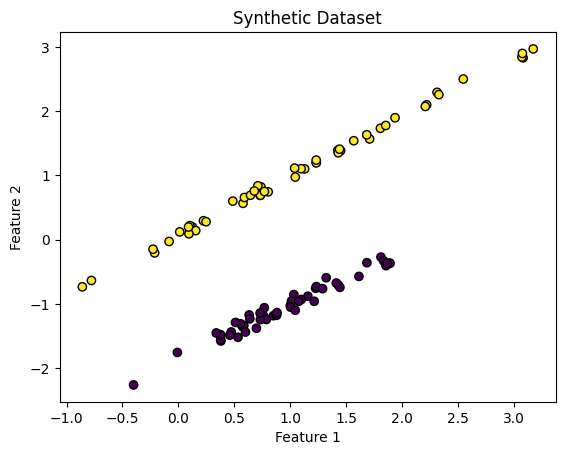

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)


In [3]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


## Implemention of GNB on Census Income Dataset

### Importing Libraries

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

census_data = pd.read_csv(url, header=None, names=column_names)
# what does attributes names do? It assigns column names to the DataFrame.

print(census_data.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

## Preprocessing the Data
converting categorical variables into numerical values

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_features = [
    "workclass", "education", "marital-status", "occupation", "relationship",
    "race", "sex", "native-country", "income"]
for feature in categorical_features:
    census_data[feature] = le.fit_transform(census_data[feature].astype(str))

census_data[
  ['age', 'fnlwgt', 'education-num', 'capital-gain', 
             'capital-loss', 'hours-per-week']] = census_data[
  ['age', 'fnlwgt','education-num', 'capital-gain', 'capital-loss',
   'hours-per-week']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(census_data.head())

        age  workclass    fnlwgt  education  education-num  marital-status  \
0  0.301370          7  0.044302          9       0.800000               4   
1  0.452055          6  0.048238          9       0.800000               2   
2  0.287671          4  0.138113         11       0.533333               0   
3  0.493151          4  0.151068          1       0.400000               2   
4  0.150685          4  0.221488          9       0.800000               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1       0.02174           0.0   
1           4             0     4    1       0.00000           0.0   
2           6             1     4    1       0.00000           0.0   
3           6             0     2    1       0.00000           0.0   
4          10             5     2    0       0.00000           0.0   

   hours-per-week  native-country  income  
0        0.397959              39       0  
1        0.122449     

## Training the Gaussian Naive Bayes Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = census_data.drop("income", axis=1)
# drop the column named income from the DataFrame and assign the rest to X
y = census_data["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)